# Mapa das escolas do RS por taxa de distroção de série

In [1]:
# pip permite instalar novas bibliotecas
#! permite a execução de comandos executáveis no jupyter notebook
!pip install folium

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 20.2b1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
# Importando as bibliotecas
import pandas as pd
%matplotlib inline
import folium 

In [3]:
# Carregando o arquivo csv
df = pd.read_csv('fee-2013-mun-taxa-de-distorcao-idade-serie-total-102524.csv', encoding='latin1', skiprows=1)

df.head()

,Município,ibge,latitude,longitude,/Educação/Ens...de Série/Total 2013 (-)
0,Aceguá,4300034,-31.86076,-54.16706,"25,7"
1,Água Santa,4300059,-28.16720,-52.03100,"14,7"
2,Agudo,4300109,-29.64470,-53.25150,"26,4"
3,Ajuricaba,4300208,-28.23420,-53.77570,"24,1"
4,Alecrim,4300307,-27.65790,-54.76490,"18,9"


In [4]:
#Renomeando colunas
df.rename(columns={'/Educação/Ens...de Série/Total 2013 (-)': 'tx_distorcao'}, inplace=True)

df.head()

,Município,ibge,latitude,longitude,tx_distorcao
0,Aceguá,4300034,-31.86076,-54.16706,"25,7"
1,Água Santa,4300059,-28.16720,-52.03100,"14,7"
2,Agudo,4300109,-29.64470,-53.25150,"26,4"
3,Ajuricaba,4300208,-28.23420,-53.77570,"24,1"
4,Alecrim,4300307,-27.65790,-54.76490,"18,9"


In [5]:
#Verificando os tipos do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 5 columns):
Município       495 non-null object
ibge            495 non-null int64
latitude        495 non-null float64
longitude       495 non-null float64
tx_distorcao    495 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 19.4+ KB


In [6]:
#Transformar a tx de distorção em números - vamos transformar as virgulas em pontos e os textos em números
# Converter tx_distorção para float
# Primeiro vamos trocar virgula por ponto
df['tx_distorcao'] = df['tx_distorcao'].str.replace(',','.')

df.head()

,Município,ibge,latitude,longitude,tx_distorcao
0,Aceguá,4300034,-31.86076,-54.16706,25.7
1,Água Santa,4300059,-28.16720,-52.03100,14.7
2,Agudo,4300109,-29.64470,-53.25150,26.4
3,Ajuricaba,4300208,-28.23420,-53.77570,24.1
4,Alecrim,4300307,-27.65790,-54.76490,18.9


In [7]:
# Fazendo a conversao
df['tx_distorcao'] = df['tx_distorcao'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 5 columns):
Município       495 non-null object
ibge            495 non-null int64
latitude        495 non-null float64
longitude       495 non-null float64
tx_distorcao    495 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.4+ KB


In [8]:
# 10 municípios com menor taxa de distorção
df.nsmallest(10, 'tx_distorcao')

,Município,ibge,latitude,longitude,tx_distorcao
490,Vista Alegre do Prata,4323606,-28.8052,-51.7946,2.6
375,Santo Antônio do Palma,4317558,-28.4956,-52.0267,4.3
28,Áurea,4301552,-27.6936,-52.0505,5.8
268,Nicolau Vergueiro,4312674,-28.5298,-52.4676,7.0
128,Derrubadas,4306320,-27.2642,-53.8645,7.4
119,Cotiporã,4305959,-28.9891,-51.6971,7.5
68,Campestre da Serra,4303673,-28.7926,-51.0941,7.6
476,Vanini,4322558,-28.4758,-51.8447,7.8
236,Linha Nova,4311643,-29.4679,-51.2003,8.0
392,São José do Inhacorá,4318499,-27.7251,-54.1275,8.0


In [9]:
# 10 municípios com maior taxa de distorção
df.nlargest(10, 'tx_distorcao')

,Município,ibge,latitude,longitude,tx_distorcao
307,Pedras Altas,4314175,-31.7217,-53.5838,56.0
316,Pinheiro Machado,4314506,-31.5794,-53.3798,53.9
17,Arambaré,4300851,-30.9093,-51.5046,52.8
140,Eldorado do Sul,4306767,-30.0847,-51.6187,51.9
35,Barra do Quaraí,4301875,-30.2029,-57.5497,51.5
393,São José do Norte,4318507,-32.0151,-52.0331,49.4
413,São Valério do Sul,4319737,-27.7906,-53.9368,49.2
193,Hulha Negra,4309654,-31.4067,-53.8667,49.0
106,Chuí,4305439,-33.6866,-53.4594,48.6
233,Lavras do Sul,4311502,-30.8071,-53.8931,47.7


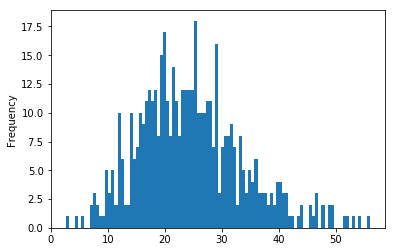

In [10]:
#Plotando o histograma da Taxa de distorção
df['tx_distorcao'].plot.hist(bins=100)

In [11]:
#Quantidade de municípios com tx_distorcao menor ou igual a 10
df[df['tx_distorcao']<=10].count()

Município       17
ibge            17
latitude        17
longitude       17
tx_distorcao    17
dtype: int64

In [12]:
#Quantidade de municípios com tx_distorcao maior ou igual a 145
df[df['tx_distorcao']>=45].count()

Município       17
ibge            17
latitude        17
longitude       17
tx_distorcao    17
dtype: int64

In [13]:
#Vamos aprender como o Folium funciona

#Criar um mapa, com base em coordenada central
brasil = folium.Map(
    location=[-11.1260466, -90.8062191], #coordenadas do google maps
    zoom_start=4
)

# mostrando o mapa
brasil

In [14]:
# Criando o mapa do Rio Grande do Sul
rs = folium.Map(
    # location=[-30.0862206,-62.6917813], #coordenadas do google maps (latitude, longitude)
    location=[-30.5, -52],# coordenadas ajustadas
    zoom_start=6
)
# mostrando o mapa
rs

In [15]:
#Percorrer o DataFrame com base nas melhores escolas (tx_distorcao <=10)
#e desenhar um marcador para cada escola
# usando for e iterrows

for indice, municipio in df[df['tx_distorcao'] <= 10].iterrows():
    folium.Marker(
        location=[municipio['latitude'], municipio['longitude']],
        popup=municipio['Município'],
        icon=folium.map.Icon(color='green')
    ).add_to(rs)
         
#Mostrando o Mapa    
rs

In [16]:
#Percorrer o DataFrame com base nas melhores escolas (tx_distorcao >=45)
#e desenhar um marcador para cada escola
# usando for e iterrows

for indice, municipio in df[df['tx_distorcao'] >= 45].iterrows():
    folium.Marker(
        location=[municipio['latitude'], municipio['longitude']],
        popup=municipio['Município'],
        icon=folium.map.Icon(color='red')
    ).add_to(rs)
         
#Mostrando o Mapa    
rs

In [17]:
#Qula a taxa de distorção de PA (Porto Alegre)
df[df['Município'] == 'Porto Alegre']['tx_distorcao']

325    32.3
Name: tx_distorcao, dtype: float64